In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def ecdf(data, mode ='g'):
    """
    calculating empirical CDF for a sample.
    
    """
    x = np.sort(data)
    n = x.size
    if mode == 'g':
        y = np.arange(1, n+1) / n
    elif mode == 'l':
        y = np.arange(0, n) / n
    return y    

In [2]:
# This is to suppress warning messages
# Not a great thing to do, but I want to suppress the AD p-value warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib notebook

In [4]:
np.random.seed(1)
samp1_size = 16
samp2_size = 25
samp1 = st.norm(100,20).rvs(samp1_size)
samp1_er = st.uniform(5,10).rvs(samp1_size)
samp2 = st.norm(120,20).rvs(samp2_size)
samp2_er = st.uniform(5,10).rvs(samp2_size)

<IPython.core.display.Javascript object>


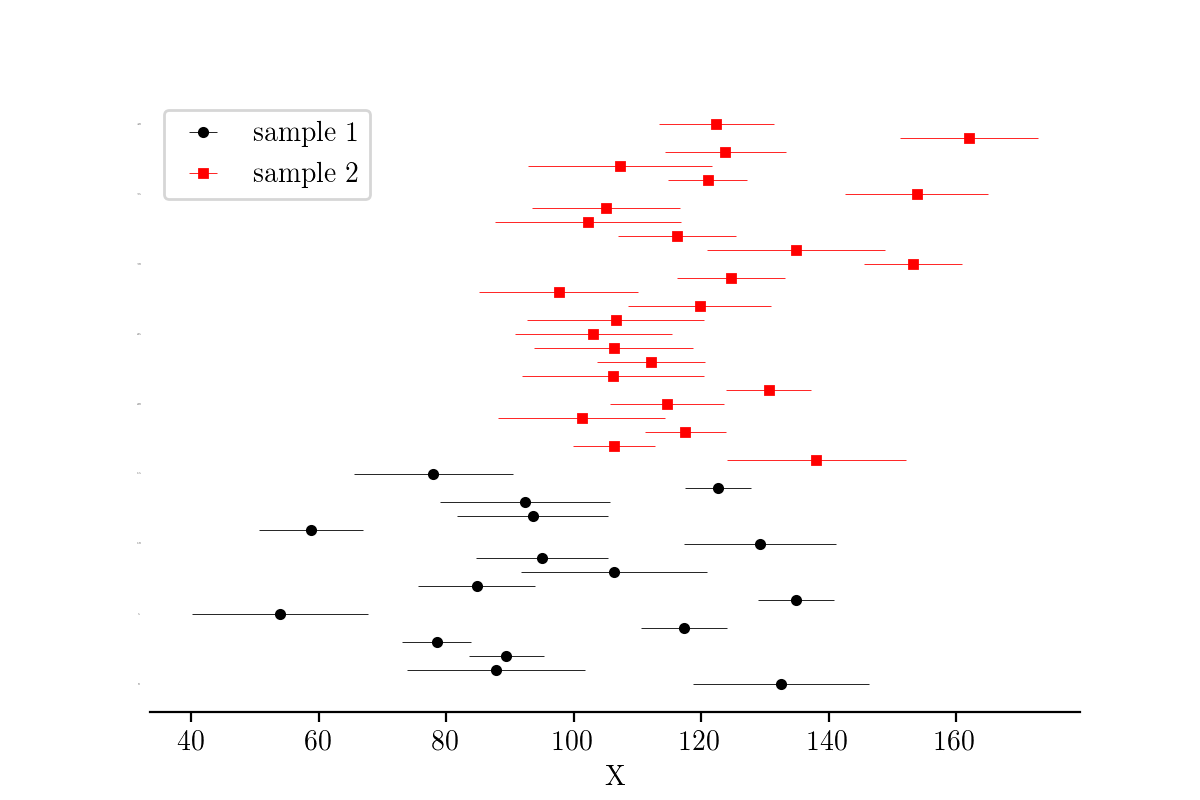

In [5]:
fig = plt.figure(figsize=(6,4))
ax0 = fig.add_subplot(1,1,1)
ax0.errorbar(x=samp1,xerr=samp1_er,y=np.arange(0,len(samp1)),
             fmt='ok',ms=3.0,capsize=0,elinewidth=0.3,label='sample 1')
ax0.errorbar(x=samp2,xerr=samp2_er,y=np.arange(len(samp1),len(samp1)+len(samp2)),
             fmt='sr',ms=3.0,capsize=0,elinewidth=0.3,label='sample 2')
ax0.legend(loc=2)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.tick_params(axis='y', which='major', length=0)
ax0.tick_params(axis='y', labelsize=0)
ax0.set(xlabel='X');

<IPython.core.display.Javascript object>


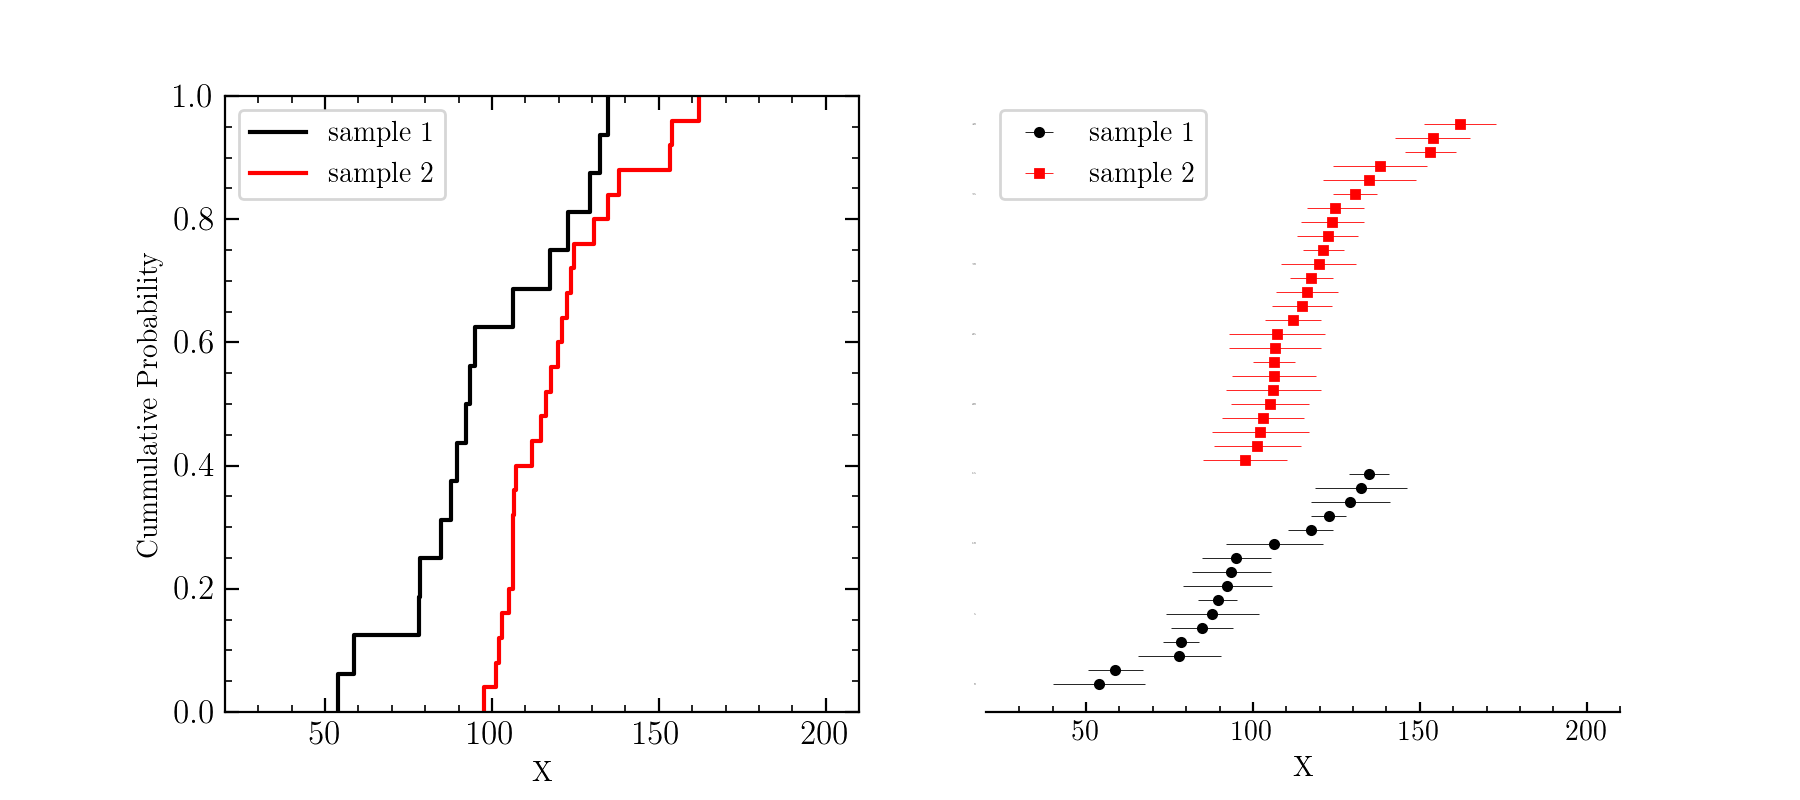

K-S test: Ks_2sampResult(statistic=0.625, pvalue=0.00038895691813567446)
A-D test: Anderson_ksampResult(statistic=5.895988059882129, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016788476986111297)


In [6]:
fig = plt.figure(figsize=(9,4))

ax0 = fig.add_subplot(1,2,1)
np.concatenate([np.sort(samp1)[:1],np.sort(samp1)])
np.concatenate([[0],ecdf(samp1)])

ax0.step(np.concatenate([np.sort(samp1)[:1],np.sort(samp1)]),
         np.concatenate([[0],ecdf(samp1)]),
         where='post',color='k',label='sample 1')
ax0.step(np.concatenate([np.sort(samp2)[:1],np.sort(samp2)]),
         np.concatenate([[0],ecdf(samp2)]),
         where='post',color='r',label='sample 2')

ax0.legend(loc=2)
ax0.set(xlabel='X',ylabel='Cummulative Probability',ylim=[0,1],xlim=[20,210]);
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=12, length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both', direction='in',right=True,top=True)
    
ax1 = fig.add_subplot(1,2,2)
ax1.errorbar(x=np.sort(samp1),xerr=samp1_er[samp1.argsort()],y=np.arange(0,len(samp1)),
             fmt='ok',ms=3.0,capsize=0,elinewidth=0.3,label='sample 1')
ax1.errorbar(x=np.sort(samp2),xerr=samp2_er[samp2.argsort()],y=np.arange(len(samp1),len(samp1)+len(samp2)),
             fmt='sr',ms=3.0,capsize=0,elinewidth=0.3,label='sample 2')
ax1.legend(loc=2)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.minorticks_on()
ax1.tick_params(axis='y', which='both', length=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.set(xlabel='X',xlim=[20,210]);

print('K-S test:',st.ks_2samp(samp1,samp2))
print('A-D test:',st.anderson_ksamp((samp1,samp2)))

<IPython.core.display.Javascript object>


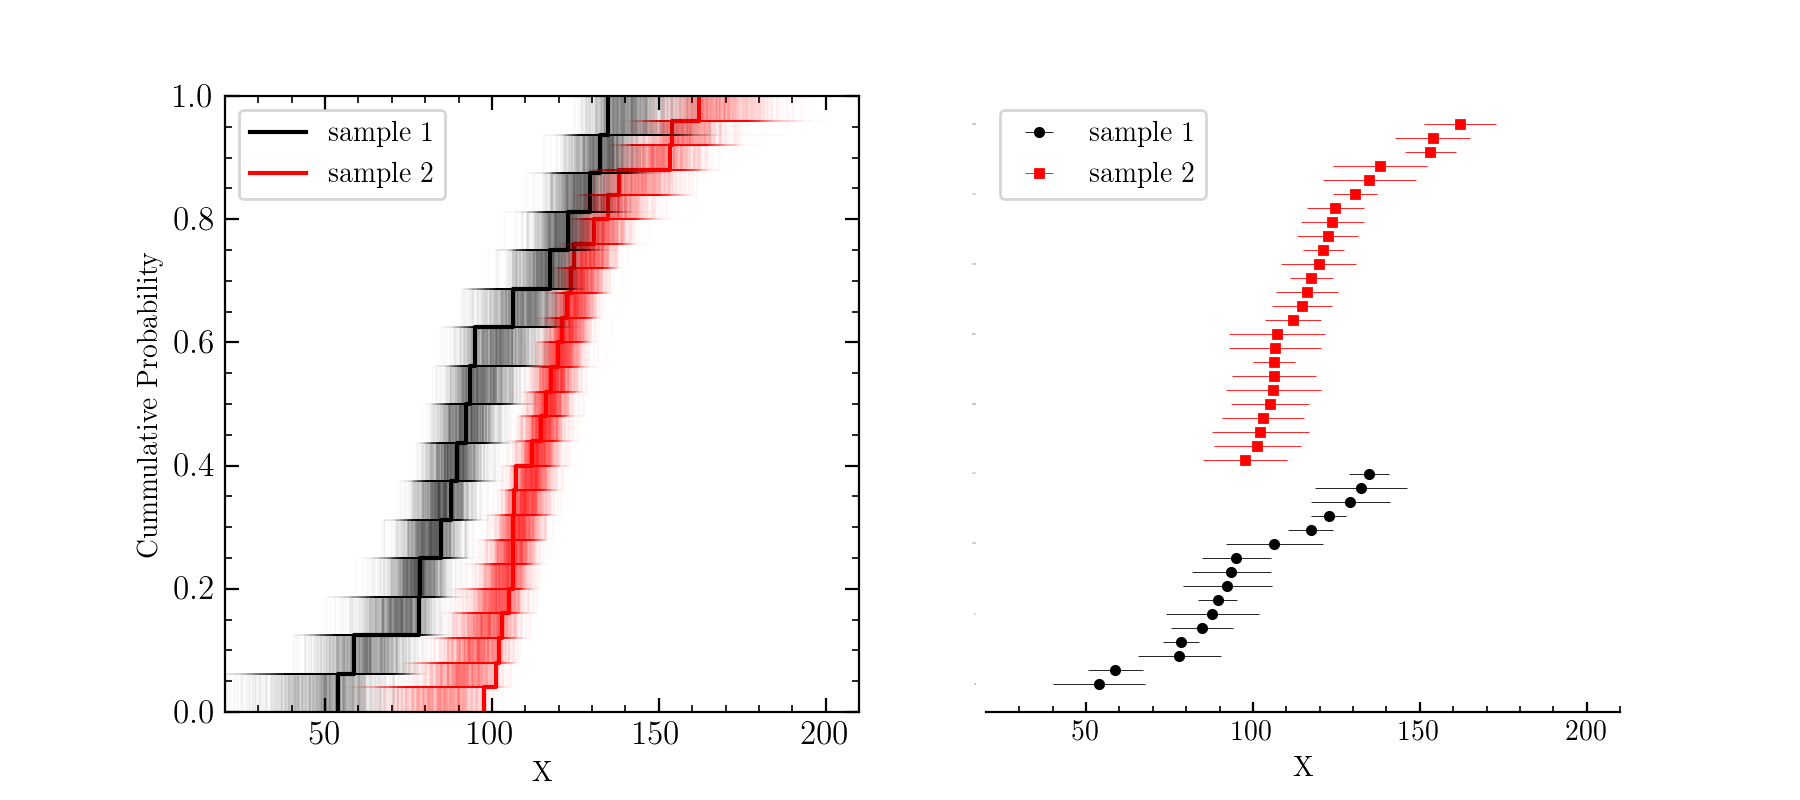

In [7]:
fig = plt.figure(figsize=(9,4))

ax0 = fig.add_subplot(1,2,1)
np.concatenate([np.sort(samp1)[:1],np.sort(samp1)])
np.concatenate([[0],ecdf(samp1)])

ax0.step(np.concatenate([np.sort(samp1)[:1],np.sort(samp1)]),
         np.concatenate([[0],ecdf(samp1)]),
         where='post',color='k',label='sample 1')
ax0.step(np.concatenate([np.sort(samp2)[:1],np.sort(samp2)]),
         np.concatenate([[0],ecdf(samp2)]),
         where='post',color='r',label='sample 2')

ax0.legend(loc=2)
ax0.set(xlabel='X',ylabel='Cummulative Probability',ylim=[0,1],xlim=[20,210]);
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=12, length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both', direction='in',right=True,top=True)


# Now let's add uncertainties via bootstrap:
nbootstrap = 1000
bootstrap_samp1 = st.norm(samp1,samp1_er).rvs([nbootstrap,samp1_size])
bootstrap_samp2 = st.norm(samp2,samp2_er).rvs([nbootstrap,samp2_size])
bootstrap_ks_scor = np.empty(nbootstrap)
bootstrap_ad_scor = np.empty(nbootstrap)
bootstrap_ks_prob = np.empty(nbootstrap)
bootstrap_ad_prob = np.empty(nbootstrap)

for i in range(nbootstrap):
    ax0.step(np.concatenate([np.sort(bootstrap_samp1[i])[:1],np.sort(bootstrap_samp1[i])]),
             np.concatenate([[0],ecdf(bootstrap_samp1[i])]),
             where='post',color='k',lw=0.1,alpha=0.1)
    ax0.step(np.concatenate([np.sort(bootstrap_samp2[i])[:1],np.sort(bootstrap_samp2[i])]),
             np.concatenate([[0],ecdf(bootstrap_samp2[i])]),
             where='post',color='r',lw=0.1,alpha=0.1)
    bootstrap_ks_scor[i], bootstrap_ks_prob[i] = st.ks_2samp(bootstrap_samp1[i],bootstrap_samp2[i])
    bootstrap_ad_scor[i], dummy, bootstrap_ad_prob[i] = st.anderson_ksamp([bootstrap_samp1[i],bootstrap_samp2[i]], 
                                                                          midrank=False)

ax1 = fig.add_subplot(1,2,2)
ax1.errorbar(x=np.sort(samp1),xerr=samp1_er[samp1.argsort()],y=np.arange(0,len(samp1)),
             fmt='ok',ms=3.0,capsize=0,elinewidth=0.3,label='sample 1')
ax1.errorbar(x=np.sort(samp2),xerr=samp2_er[samp2.argsort()],y=np.arange(len(samp1),len(samp1)+len(samp2)),
             fmt='sr',ms=3.0,capsize=0,elinewidth=0.3,label='sample 2')
ax1.legend(loc=2)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.minorticks_on()
ax1.tick_params(axis='y', which='both', length=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.set(xlabel='X',xlim=[20,210]);

<IPython.core.display.Javascript object>


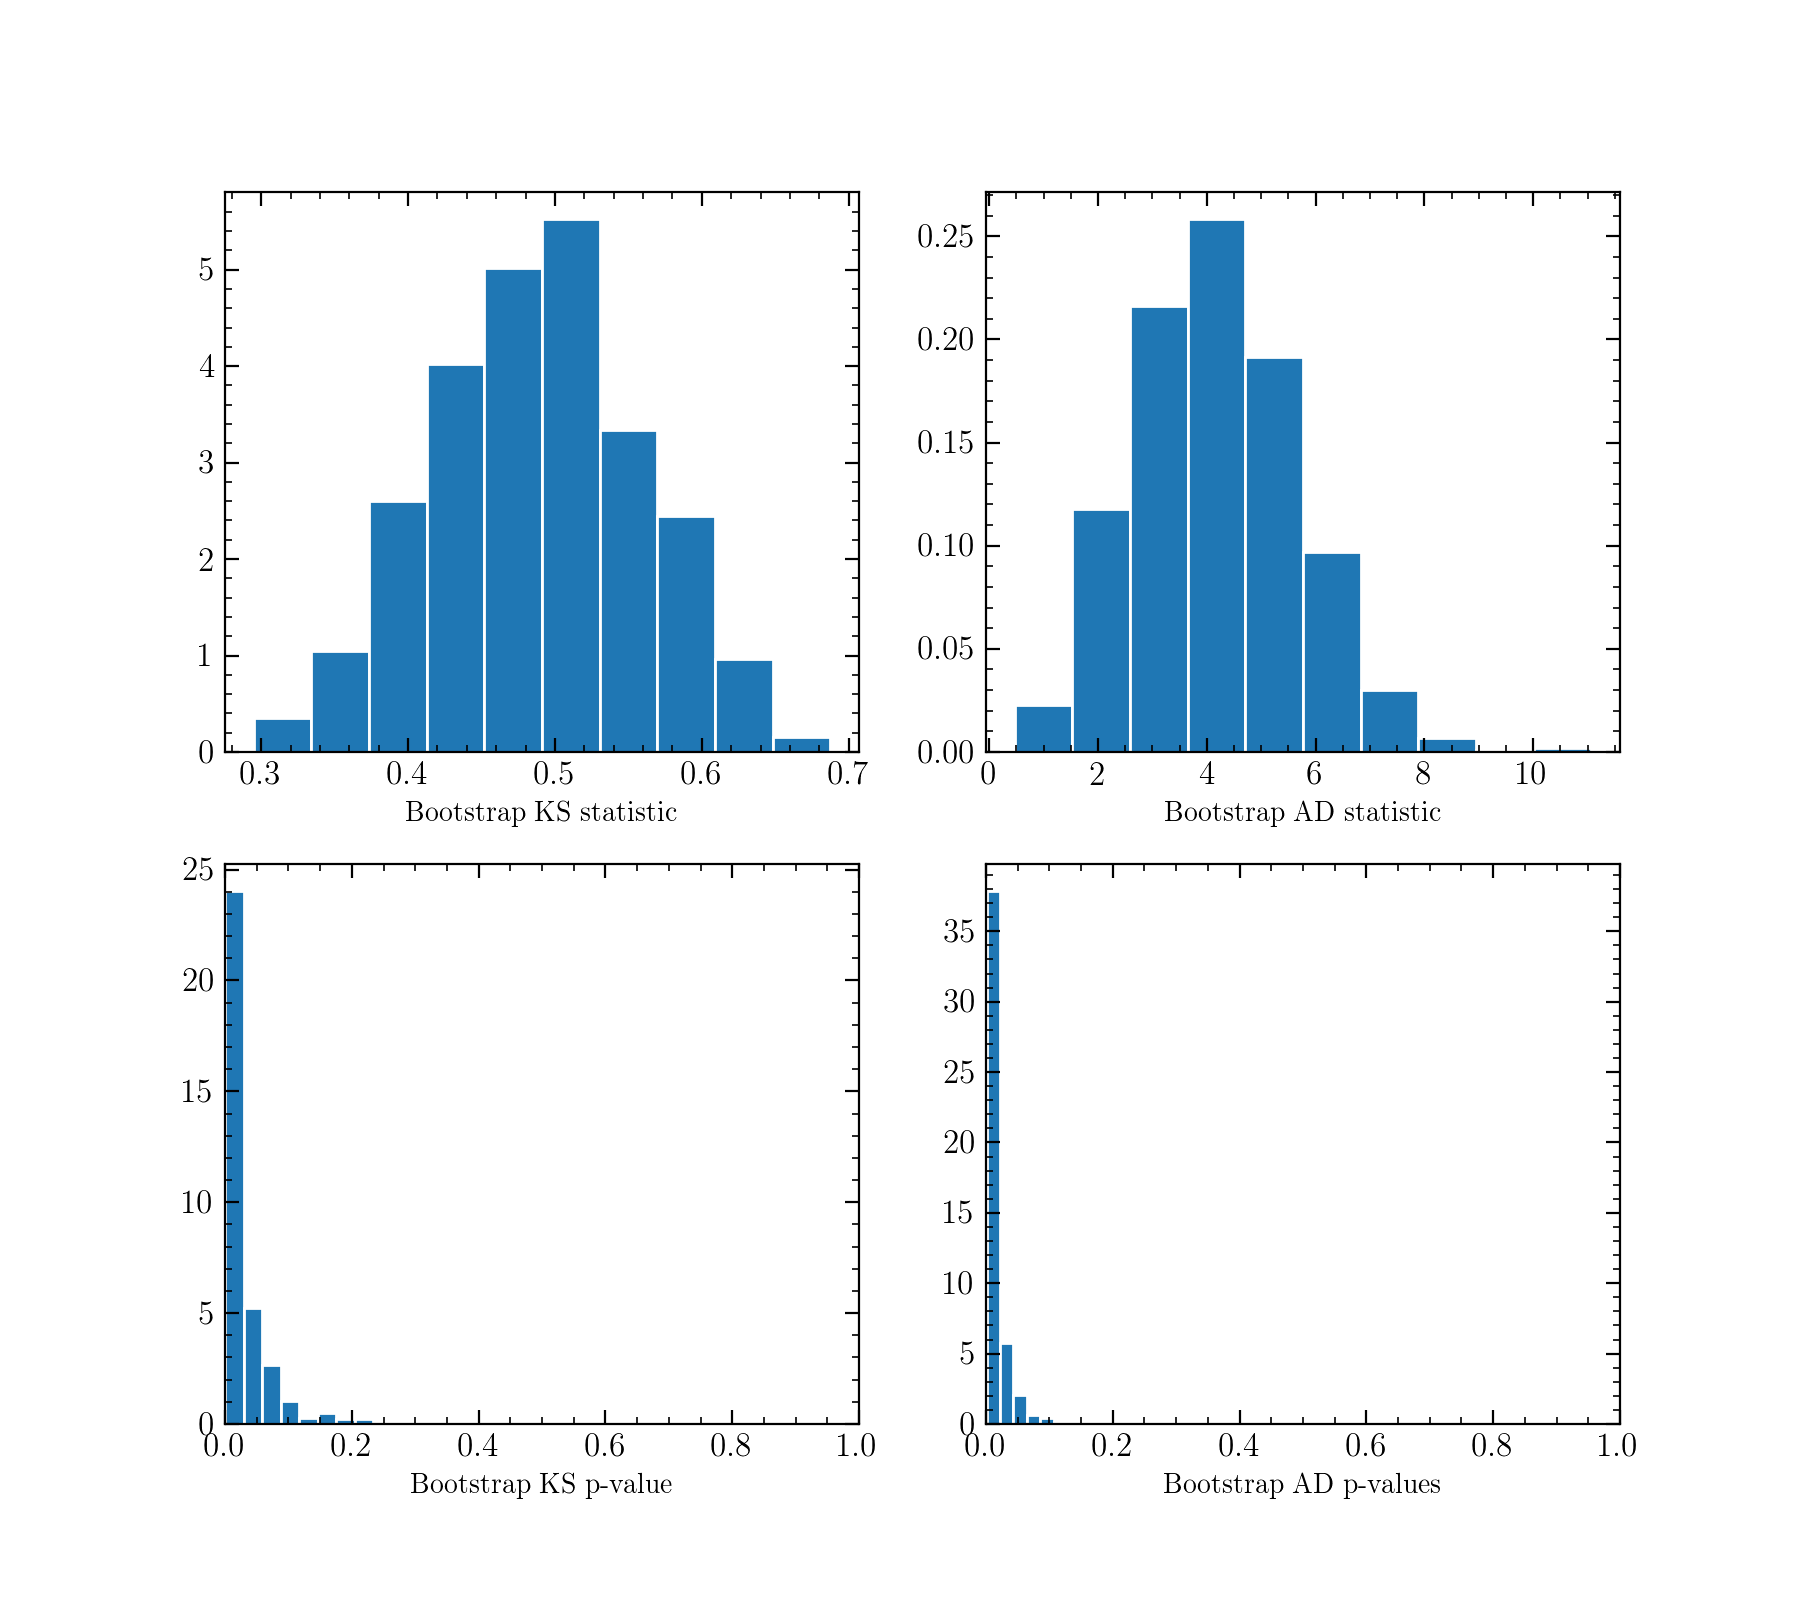

In [8]:
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(2,2,1)
ax1.hist(bootstrap_ks_scor,density=True,edgecolor='w')
ax1.set(xlabel='Bootstrap KS statistic');
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=12, length=5)
ax1.tick_params(axis='both', which='minor', length=2.5)
ax1.tick_params(axis='both', which='both', direction='in',right=True,top=True)
ax2 = fig.add_subplot(2,2,2)
ax2.hist(bootstrap_ad_scor,density=True,edgecolor='w')
ax2.set(xlabel='Bootstrap AD statistic');
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=12, length=5)
ax2.tick_params(axis='both', which='minor', length=2.5)
ax2.tick_params(axis='both', which='both', direction='in',right=True,top=True)
ax3 = fig.add_subplot(2,2,3)
ax3.hist(bootstrap_ks_prob,density=True,edgecolor='w')
ax3.set(xlabel='Bootstrap KS p-value', xlim=[0,1])
ax3.minorticks_on()
ax3.tick_params(axis='both', which='major', labelsize=12, length=5)
ax3.tick_params(axis='both', which='minor', length=2.5)
ax3.tick_params(axis='both', which='both', direction='in',right=True,top=True)
ax4 = fig.add_subplot(2,2,4)
ax4.hist(bootstrap_ad_prob,density=True,edgecolor='w')
ax4.set(xlabel='Bootstrap AD p-values', xlim=[0,1])
ax4.minorticks_on()
ax4.tick_params(axis='both', which='major', labelsize=12, length=5)
ax4.tick_params(axis='both', which='minor', length=2.5)
ax4.tick_params(axis='both', which='both', direction='in',right=True,top=True)